<a href="https://colab.research.google.com/github/Arpit1118/Pytorch/blob/main/Simple_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F


In [2]:
# Creating a model class that inherits nn.module
class Model(nn.Module):
  #Input layer(4 features of the flower) -->
  #Hidden Layers --> (Number of neurons)
  #Output (3 classes of iris flower)
  def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
    super().__init__()  #instantiate our nn.Module
    self.fc1 = nn.Linear(in_features,h1)
    self.fc2 = nn.Linear(h1,h2)
    self.out = nn.Linear(h2,out_features)

  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)
    return x


In [3]:
#Pick a manual seed for randomization
torch.manual_seed(41)
#Create an instance of model
model = Model()

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [5]:
url ='https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
df = pd.read_csv(url)

In [6]:
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [7]:
# One-Hot encoding on the variety column
df['variety'] = df['variety'].replace({'Setosa':0, 'Versicolor':1, 'Virginica':2})

<ipython-input-7-0fa8d1c1b808>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['variety'] = df['variety'].replace({'Setosa':0, 'Versicolor':1, 'Virginica':2})


In [8]:
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [9]:
#Train test split, X and y
X = df.drop('variety', axis = 1)
y = df['variety']

In [10]:
#Convert these to numpy arrays
X = X.values
y = y.values

In [11]:
X[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=11)

In [13]:
#X and y features to float tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [14]:
#Criterion of model to measure the error
criterion = nn.CrossEntropyLoss()
#Adam Optimizer, learning rate, lower learning rate
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)


In [15]:
#Train our model
#Epochs = one run through all the training data in our network
epochs = 100
losses =[]
for i in range (epochs):
  y_pred = model.forward(X_train)  #Getting predicted results
  loss = criterion(y_pred, y_train) #Comparing predicted results
  losses.append(loss)
  if i % 10 == 0:   #print after every 10 epoch
    print(f'Epoch: {i} and loss: {loss}')
  #Back Propogation to fine tune the weights
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch: 0 and loss: 1.1233184337615967
Epoch: 10 and loss: 1.0094598531723022
Epoch: 20 and loss: 0.8189286589622498
Epoch: 30 and loss: 0.589458167552948
Epoch: 40 and loss: 0.40074995160102844
Epoch: 50 and loss: 0.2676362693309784
Epoch: 60 and loss: 0.18145975470542908
Epoch: 70 and loss: 0.12769727408885956
Epoch: 80 and loss: 0.0960279181599617
Epoch: 90 and loss: 0.07848627120256424


Text(0.5, 0, 'Epoch')

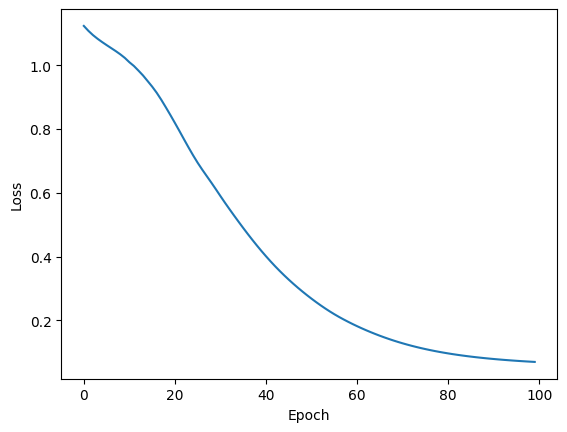

In [16]:
plt.plot(range(epochs), [loss.item() for loss in losses])
plt.ylabel('Loss')
plt.xlabel('Epoch')

In [17]:
#Model evaluation on test data set
with torch.no_grad():  #Turning off back propogation
  y_eval = model.forward(X_test)
  loss_test = criterion(y_eval, y_test)

In [18]:
loss_test

tensor(0.0803)

In [19]:

correct = 0
with torch.no_grad():
  for i, data in enumerate(X_test):
    y_val = model.forward(data)

    if y_test[i] == 0:
      x = "Setosa"
    elif y_test[i] == 1:
      x = 'Versicolor'
    else:
      x = 'Virginica'


    # Will tell us what type of flower class our network thinks it is
    print(f'{i+1}.)  {str(y_val)} \t {y_test[i]} \t {y_val.argmax().item()}')

    # Correct or not
    if y_val.argmax().item() == y_test[i]:
      correct +=1

print(f'We got {correct} correct!')

1.)  tensor([-7.3326,  4.9644,  8.1582]) 	 2 	 2
2.)  tensor([-7.3478,  4.9726,  8.1587]) 	 2 	 2
3.)  tensor([-5.5571,  5.1178,  5.0062]) 	 2 	 1
4.)  tensor([-4.7407,  5.6936,  2.9710]) 	 1 	 1
5.)  tensor([-6.8680,  4.6819,  7.6979]) 	 2 	 2
6.)  tensor([ 4.5264, -2.1161, -2.8825]) 	 0 	 0
7.)  tensor([-3.9716,  5.9061,  1.4466]) 	 1 	 1
8.)  tensor([ 5.3263, -2.7934, -3.2770]) 	 0 	 0
9.)  tensor([ 4.1273, -1.7527, -2.7051]) 	 0 	 0
10.)  tensor([-4.6471,  5.3939,  3.1554]) 	 1 	 1
11.)  tensor([-5.9595,  4.5288,  6.3413]) 	 2 	 2
12.)  tensor([-3.2766,  5.2031,  1.0808]) 	 1 	 1
13.)  tensor([-4.5657,  4.7777,  3.7256]) 	 1 	 1
14.)  tensor([-6.8938,  3.9837,  8.5307]) 	 2 	 2
15.)  tensor([-7.0807,  5.2245,  7.4351]) 	 2 	 2
16.)  tensor([ 3.5332, -1.2187, -2.4358]) 	 0 	 0
17.)  tensor([-6.9341,  4.4897,  8.0493]) 	 2 	 2
18.)  tensor([-4.5427,  5.0003,  3.4295]) 	 1 	 1
19.)  tensor([-6.3471,  5.1869,  6.2460]) 	 2 	 2
20.)  tensor([-6.6299,  4.1962,  7.8547]) 	 2 	 2
21.)  ten

In [20]:
new_iris = torch.tensor([4.7,3.2,1.3,0.2])

In [21]:
with torch.no_grad():
  print(model.forward(new_iris))  #Flower is Setosa

tensor([ 4.6229, -2.2112, -2.9199])


In [22]:
#Save the model
torch.save(model.state_dict(), 'iris_model.pt')

In [23]:
#Load the model
new_model = Model()
new_model.load_state_dict(torch.load('iris_model.pt'))

<All keys matched successfully>

In [24]:
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)

**Feed Forward Neural Network on MNIST dataset**


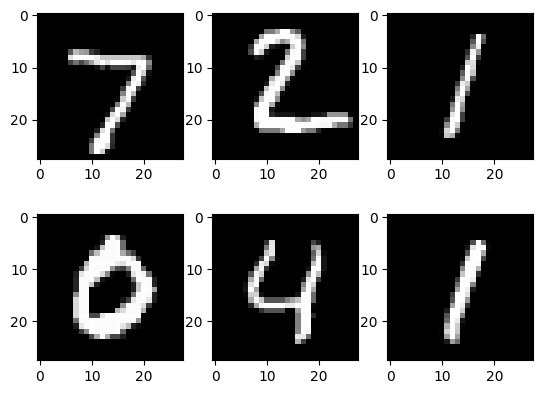

Epoch [1/2], Step [100/600], Loss: 0.2992
Epoch [1/2], Step [200/600], Loss: 0.2489
Epoch [1/2], Step [300/600], Loss: 0.2303
Epoch [1/2], Step [400/600], Loss: 0.2753
Epoch [1/2], Step [500/600], Loss: 0.2109
Epoch [1/2], Step [600/600], Loss: 0.0633
Epoch [2/2], Step [100/600], Loss: 0.1215
Epoch [2/2], Step [200/600], Loss: 0.2098
Epoch [2/2], Step [300/600], Loss: 0.1508
Epoch [2/2], Step [400/600], Loss: 0.0677
Epoch [2/2], Step [500/600], Loss: 0.0707
Epoch [2/2], Step [600/600], Loss: 0.1365
Accuracy of the network on the 10000 test images: 96.78 %


In [25]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyper-parameters
input_size = 784 # 28x28
hidden_size = 500
num_classes = 10
num_epochs = 2
batch_size = 100
learning_rate = 0.001

# MNIST dataset
train_dataset = torchvision.datasets.MNIST(root='./data',
                                           train=True,
                                           transform=transforms.ToTensor(),
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root='./data',
                                          train=False,
                                          transform=transforms.ToTensor())

# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)

examples = iter(test_loader)
example_data, example_targets = next(examples)

for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(example_data[i][0], cmap='gray')
plt.show()

# Fully connected neural network with one hidden layer
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.input_size = input_size
        self.l1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        # no activation and no softmax at the end
        return out

model = NeuralNet(input_size, hidden_size, num_classes).to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Train the model
n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # origin shape: [100, 1, 28, 28]
        # resized: [100, 784]
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 100 == 0:
            print (f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')

# Test the model
# In test phase, we don't need to compute gradients (for memory efficiency)
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        outputs = model(images)
        # max returns (value ,index)
        _, predicted = torch.max(outputs.data, 1)
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item()

    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the network on the 10000 test images: {acc} %')